In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm

In [2]:
# loading the data
df = pd.read_csv('Wine.csv')

In [3]:
# viewing first five rows
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
2,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
3,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
4,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434


In [4]:
# finding the number of rows and columns
df.shape

(178, 13)

In [5]:
# checking for null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


No column has any missing value and all columns have a numerical data type

In [6]:
# description of data
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


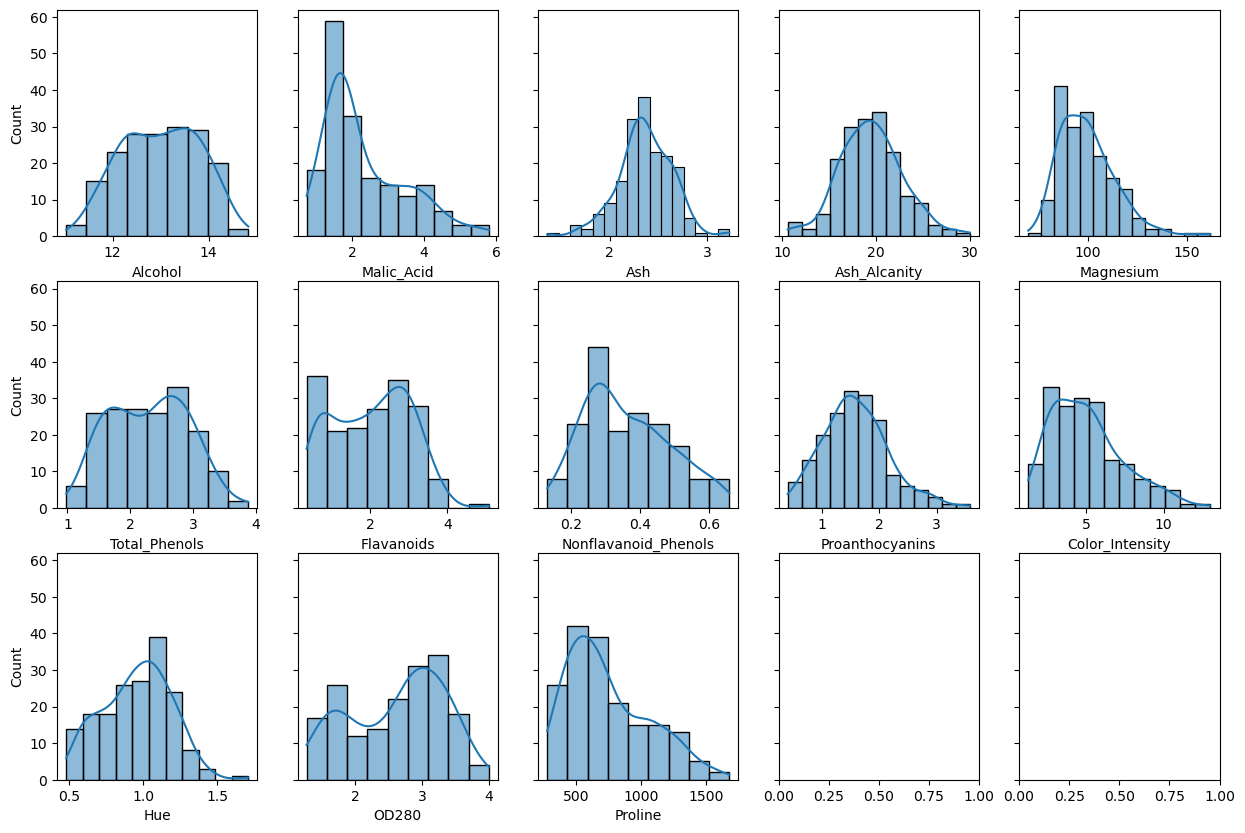

In [7]:
#histogram for each feature
fig,axes = plt.subplots(nrows=3,ncols=5,sharey=True,figsize=(15,10))
for axis,col in zip(axes.flatten(),df.columns):
    sns.histplot(data=df,x=col,ax=axis,kde = True)

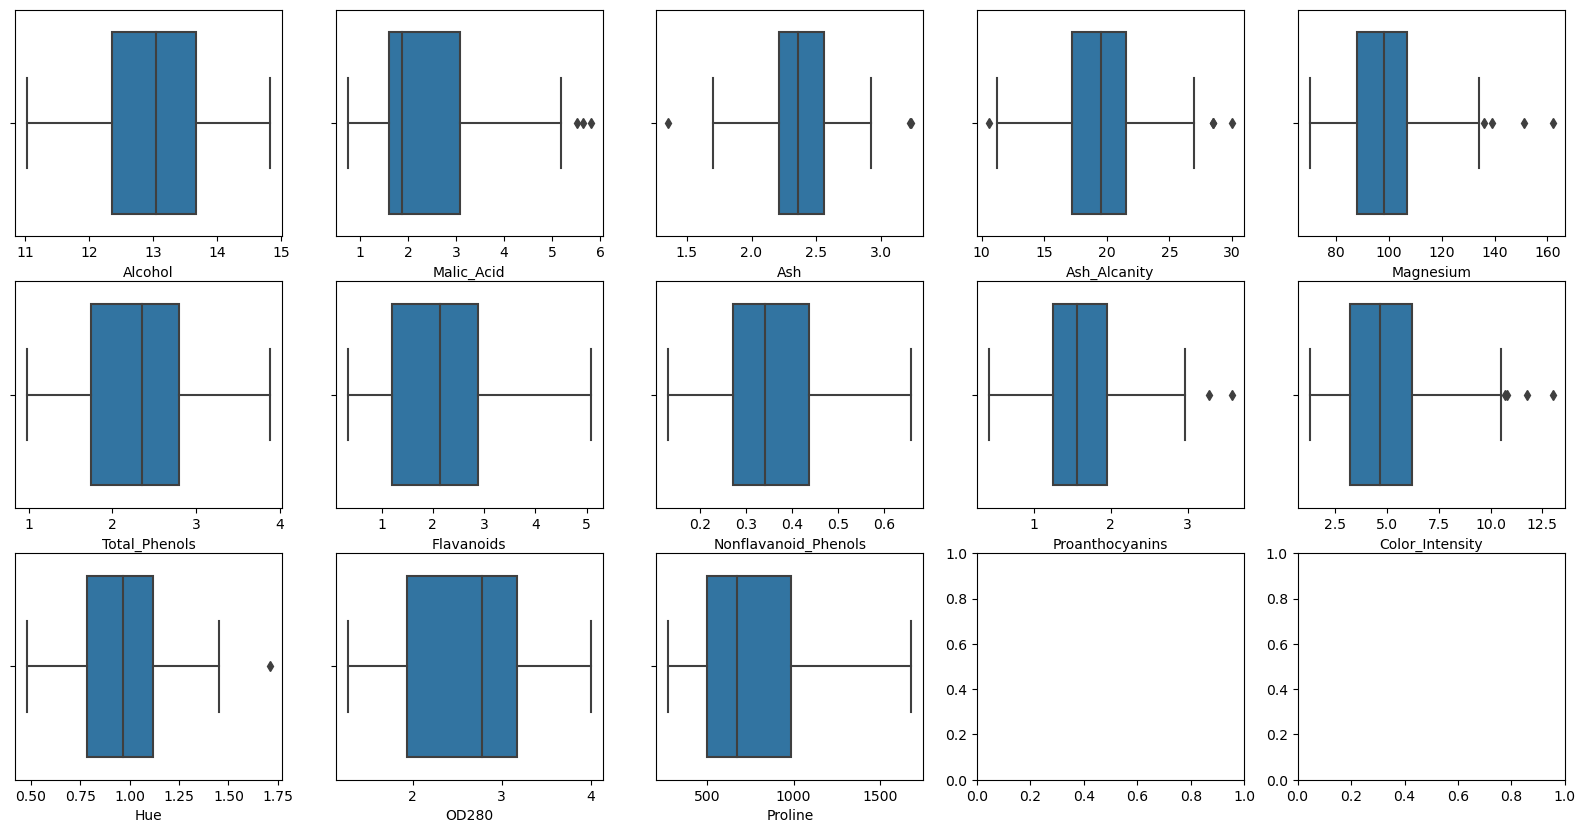

In [8]:
#boxplot for each feature
fig,axes = plt.subplots(nrows=3,ncols=5,figsize=(20,10))
for axis,col in zip(axes.flatten(),df.columns):
    sns.boxplot(data= df,x=col,ax=axis)

In [9]:
# standardising data
ss = StandardScaler()
df_new = ss.fit_transform(df)

The higher the number of features, the harder it is to work with it. I will use PCA to reduce the features. PCA will help avoid redudant features if any exists and also reduce noise

In [10]:
# obtaining the data in principal components
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_new),columns=[f'PCA{i}' for i in range(1,14)])

In [11]:
# viewing first five rows
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,0.957455,2.223528,0.142445,0.314043,0.944143,-0.382826,-0.758109,0.902452,0.096612,-1.274312,-0.172732,0.216415,-0.676128
1,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
2,-0.107228,1.928922,0.690148,-0.273722,1.071097,0.037221,-0.012702,-0.360524,0.817550,0.454460,0.003465,-0.009844,0.304740
3,3.458157,-1.130630,-1.204276,0.162458,-2.023127,0.745781,1.475773,-0.380386,-0.025702,-0.244653,-1.231801,-0.772333,0.225821
4,-0.457072,2.269416,1.061339,-0.837432,-0.323451,1.003117,-0.504431,0.741034,-0.423271,-0.506967,-0.157512,-0.327822,-0.203657


In [12]:
# obtaining variance explained by each principal component
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [13]:
# obtaining cummulative variance percentage
cum_variance = np.cumsum(pca.explained_variance_ratio_*100)
cum_variance

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

since first five components explain more than 80% of variance I will use only them for clustering here 

In [14]:
# taking first 5 principal components
df_pca_5 = df_pca[['PCA1','PCA2','PCA3','PCA4','PCA5']]

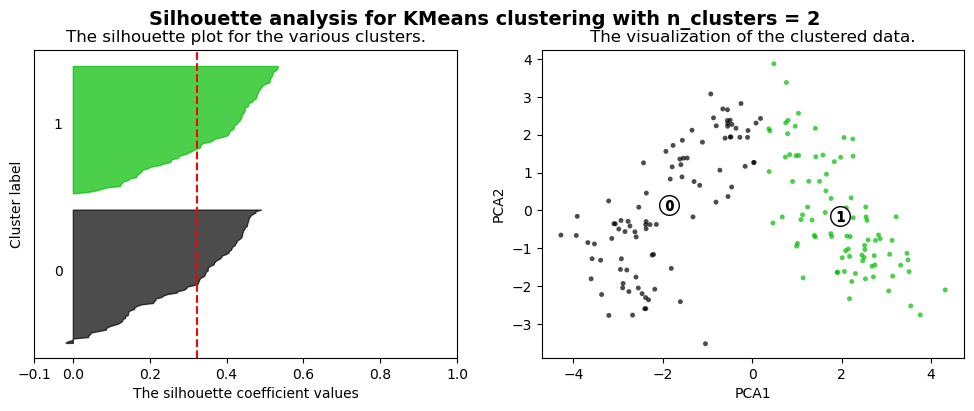

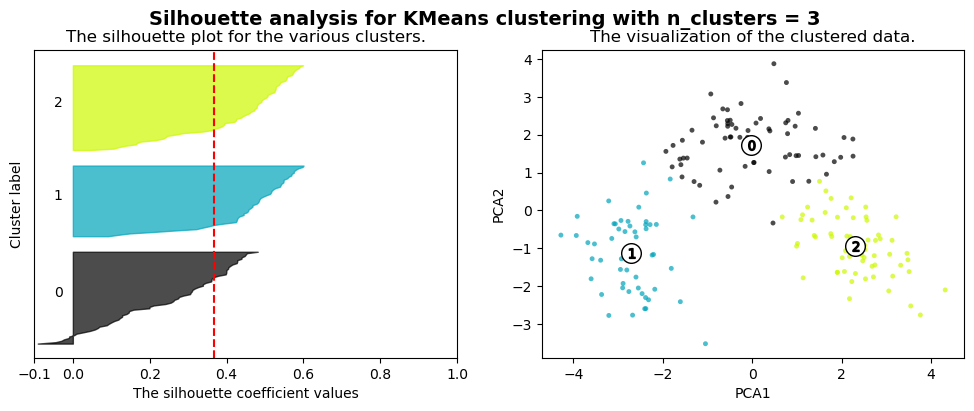

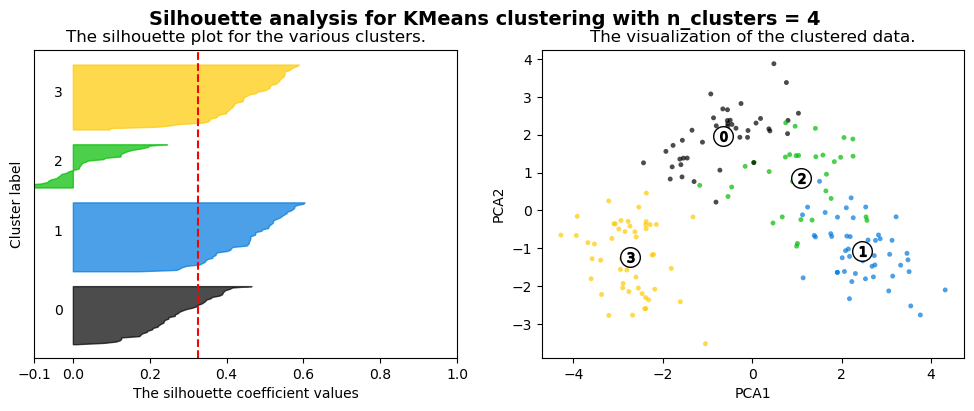

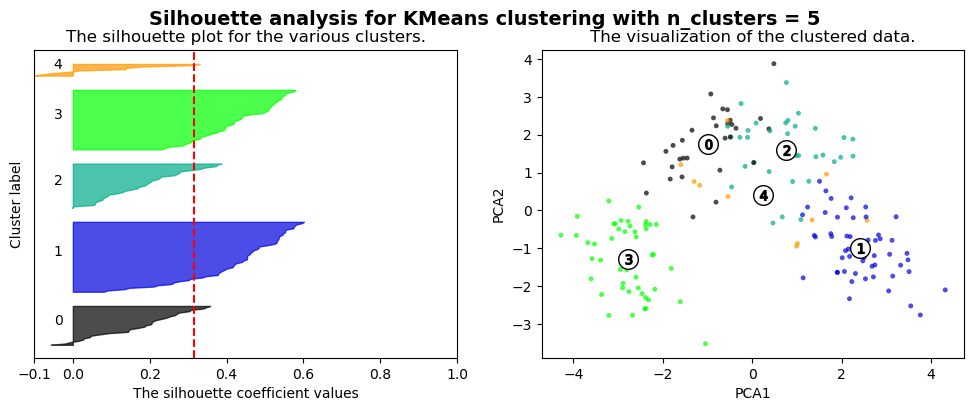

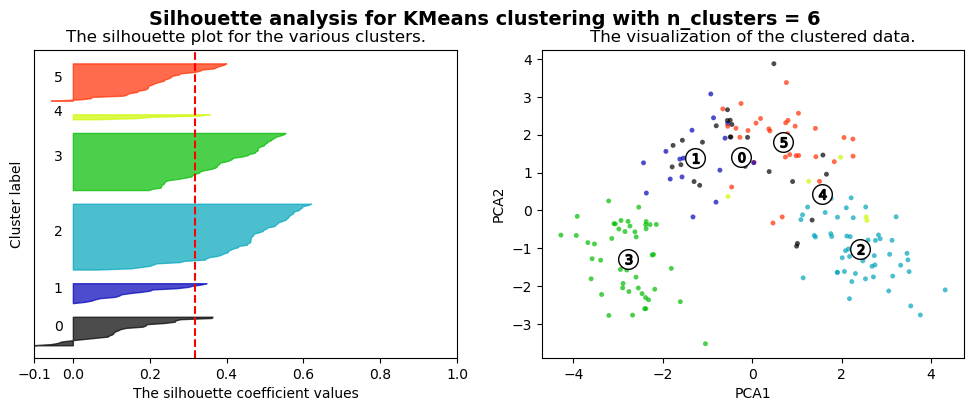

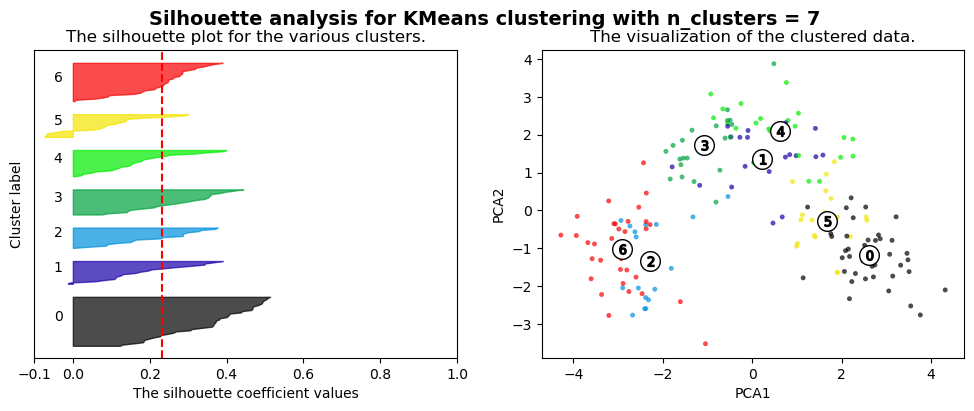

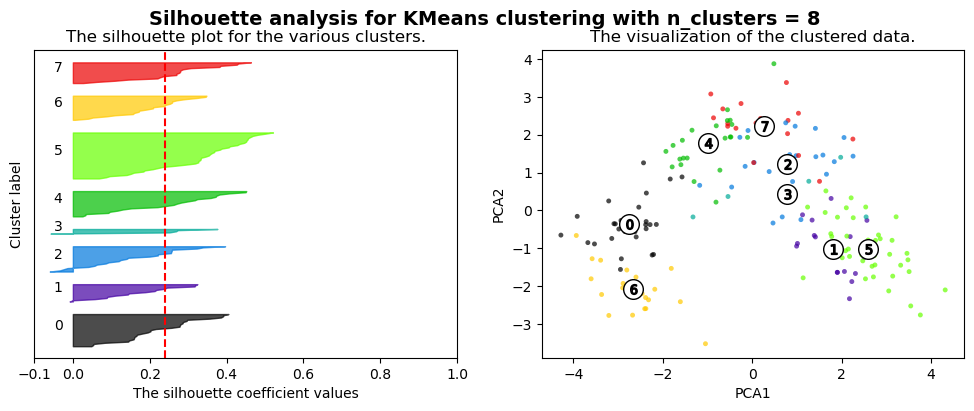

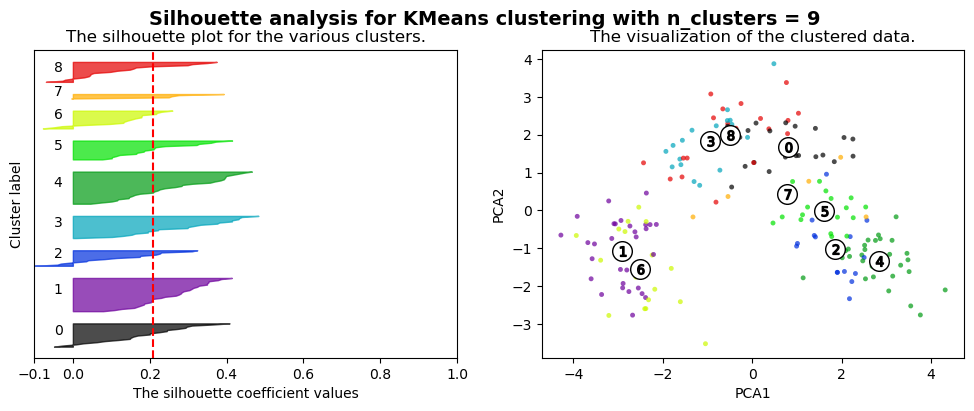

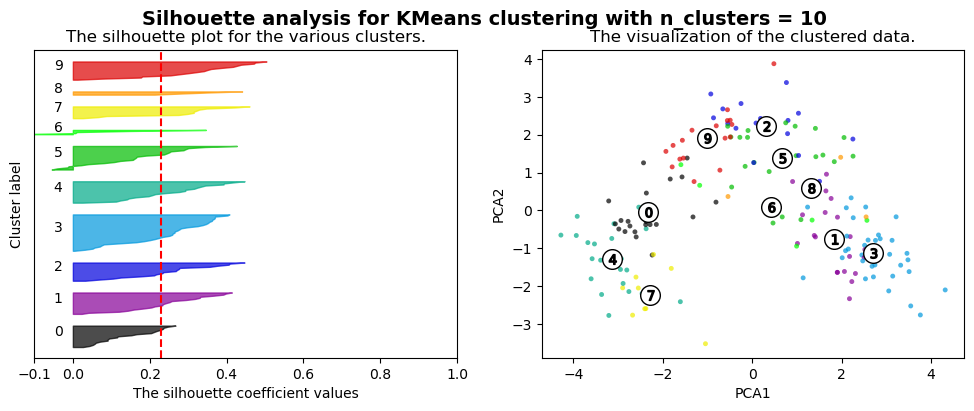

In [15]:
# silhouette plots
silhouette_scores = []
WCSS = []

for n_clusters in range(2,11):
    fig, ax = plt.subplots(1, 2,figsize=(12,4))
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_ylim([0, len(df_pca_5) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters,init = 'k-means++', random_state = 1)
    labels = clusterer.fit_predict(df_pca_5)
    
    WCSS.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(df_pca_5,labels)
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(df_pca_5,labels)
    
    
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
    
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax[0].fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax[0].set_title("The silhouette plot for the various clusters.")
    ax[0].set_xlabel("The silhouette coefficient values")
    ax[0].set_ylabel("Cluster label")
    
    ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")
    ax[0].set_yticks([])
    ax[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    ax[1].scatter(df_pca_5['PCA1'], df_pca_5['PCA2'], marker=".", s=50, lw=0, alpha=0.7, c=colors, edgecolor="k")
    centers = clusterer.cluster_centers_
    ax[1].scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k")
    
    for i, c in enumerate(centers):
        ax[1].scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        
    ax[1].set_title("The visualization of the clustered data.")
    ax[1].set_xlabel("PCA1")
    ax[1].set_ylabel("PCA2")
    
    
    plt.suptitle("Silhouette analysis for KMeans clustering with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold")

Above silhouette plots shows 2,3 are good choices for number of clusters as they have high average silhouette scores, nearly equal number of data points in each cluster, few data points and clusters with below average silhouette coefficient values. The number of data points with negative silhouette coefficient values is lower for 2,3 clusters

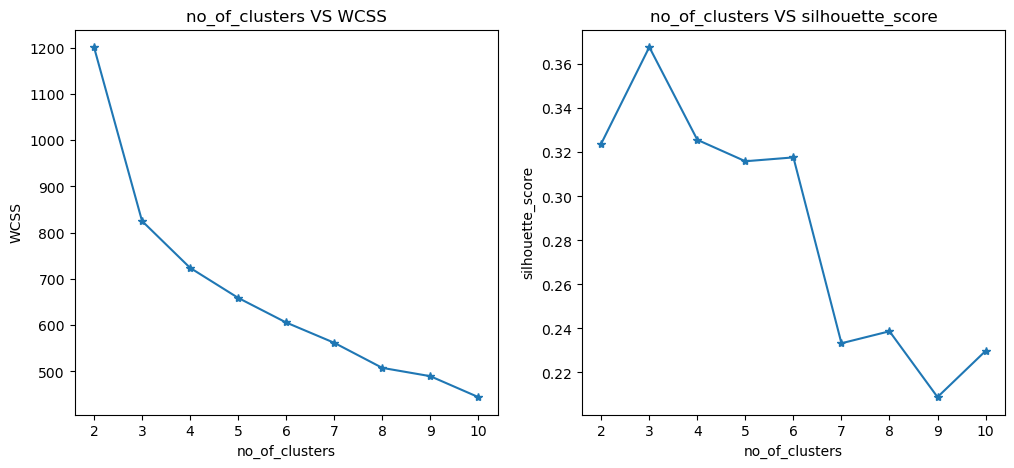

In [16]:
# WCSS,silhouette score graphs for selecting no_of_clusters
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot([2,3,4,5,6,7,8,9,10],WCSS,'*-')
plt.xlabel('no_of_clusters')
plt.ylabel('WCSS')
plt.title('no_of_clusters VS WCSS')

plt.subplot(1,2,2)
plt.plot([2,3,4,5,6,7,8,9,10],silhouette_scores,'*-')
plt.xlabel('no_of_clusters')
plt.ylabel('silhouette_score')
plt.title('no_of_clusters VS silhouette_score')
plt.show()

Elbow is formed at no_of_clusters = 3 in first graph and also silhouette score is maximum for no_of_clusters = 3 in second graph. Hence no_of_clusters = 3 is good choice.

In [17]:
# clustering with 3 clusters
clusterer = KMeans(n_clusters=3,init = 'k-means++', random_state = 1)
df['labels'] = clusterer.fit_predict(df_pca_5)

In [18]:
# mean of variables for each cluster 
df_profile = df.groupby('labels').mean().T
df_profile['overall'] = df.mean()[:-1]
df_profile

labels,0,1,2,overall
Alcohol,12.265909,13.134118,13.683934,13.000618
Malic_Acid,1.928939,3.307255,1.965410,2.336348
Ash,2.232121,2.417647,2.469180,2.366517
Ash_Alcanity,20.024242,21.241176,17.462295,19.494944
Magnesium,92.893939,98.666667,108.049180,99.741573
Total_Phenols,2.253636,1.683922,2.850984,2.295112
Flavanoids,2.058788,0.818824,3.009344,2.029270
Nonflavanoid_Phenols,0.357121,0.451961,0.291639,0.361854
Proanthocyanins,1.624697,1.145882,1.926393,1.590899
Color_Intensity,2.994091,7.234706,5.471475,5.058090


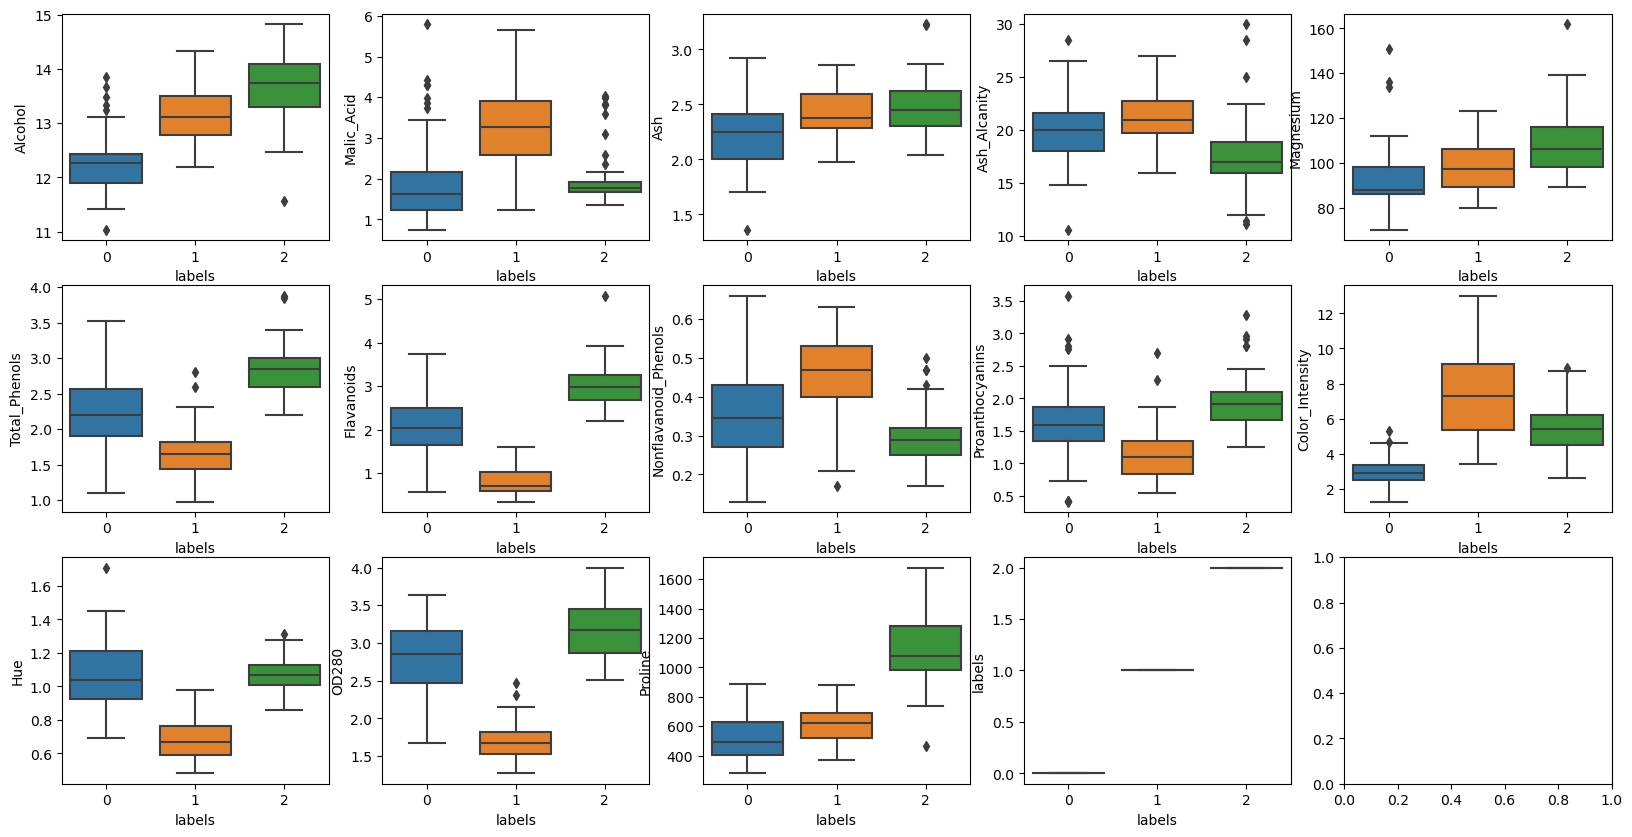

In [19]:
#values of variables from each cluster
fig,axes = plt.subplots(nrows=3,ncols=5,figsize=(20,10))
for axis,col in zip(axes.flatten(),df.columns):
    sns.boxplot(data=df,x='labels',y=col,ax=axis)

If mean of a feature of a cluster is atleast 20% more than the overall mean, then I will consider it higher and if it is atleast 20% less, then I will consider lower

In [20]:
# checking whether means for clusters are higher,lower or same
df_profile['0_vs_overall']=df_profile[[0,'overall']].apply(lambda x: 'higher' if x[0]/x['overall']>1.2 else ('lower' if x[0]/x['overall']<0.8 else 'same'),axis=1)
df_profile['1_vs_overall']=df_profile[[1,'overall']].apply(lambda x: 'higher' if x[1]/x['overall']>1.2 else ('lower' if x[1]/x['overall']<0.8 else 'same'),axis=1)
df_profile['2_vs_overall']=df_profile[[2,'overall']].apply(lambda x: 'higher' if x[2]/x['overall']>1.2 else ('lower' if x[2]/x['overall']<0.8 else 'same'),axis=1)

In [21]:
df_profile

labels,0,1,2,overall,0_vs_overall,1_vs_overall,2_vs_overall
Alcohol,12.265909,13.134118,13.683934,13.000618,same,same,same
Malic_Acid,1.928939,3.307255,1.965410,2.336348,same,higher,same
Ash,2.232121,2.417647,2.469180,2.366517,same,same,same
Ash_Alcanity,20.024242,21.241176,17.462295,19.494944,same,same,same
Magnesium,92.893939,98.666667,108.049180,99.741573,same,same,same
Total_Phenols,2.253636,1.683922,2.850984,2.295112,same,lower,higher
Flavanoids,2.058788,0.818824,3.009344,2.029270,same,lower,higher
Nonflavanoid_Phenols,0.357121,0.451961,0.291639,0.361854,same,higher,same
Proanthocyanins,1.624697,1.145882,1.926393,1.590899,same,lower,higher
Color_Intensity,2.994091,7.234706,5.471475,5.058090,lower,higher,same


Points in cluster_0 have lower values for features Color_Intensity,Proline

Points in cluster_1 have lower values for features Total_Phenols,Flavanoids,Proanthocyanins,Hue,OD280  and higher values for features Malic_Acid,Nonflavanoid_Phenols,Color_Intensity

Points in cluster_2 have higher values for features Total_Phenols,Flavanoids,Proanthocyanins,OD280,Proline